In [1268]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import linregress
from scipy.optimize import curve_fit
from ssi import SSI
from ssi.geol import EUROPA
#from ssi import LORRI

In [1485]:
#img = SSI('C2064913.pho.cub', offset_s=-50, offset_l=65)   #not fit
#img = SSI('C2062522.pho.cub',align = True) #offset_s=-50, offset_l=65) #phase = 31
img = SSI('C2065016.pho.cub', offset_l=7)#align=True) #offset_s=-50, offset_l=65)
#img = SSI('C2065024.pho.cub', offset_s=0, offset_l=-2)#align=True)#, offset_s=-50, offset_l=65)
#img = SSI('C2065032.pho.cub', offset_l=-1, offset_s=0)#align=True)#offset_s=-50, offset_l=65)
#img = SSI('C2065044.pho.cub', offset_l=4, offset_s=2)#offset_s=-50, offset_l=65) #fit is ok
#img = SSI('C2065052.pho.cub', offset_l=4)#align=True)#offset_s=-50, offset_l=65)
#img = SSI('C2065137.pho.cub', align=True)#offset_s=-50, offset_l=65)               #issue with pointing
#img = SSI('C2065145.pho.cub', offset_s=6, offset_l=14)
#img = SSI('C2065149.pho.cub', offset_s=-1, offset_l=20)
#img = SSI('C2065157.pho.cub', offset_s=2, offset_l=12)
#img = SSI('C2065205.pho.cub', offset_s=2, offset_l=20)
#img = SSI('C2065213.pho.cub', offset_s=0, offset_l=10)
#img = SSI('C2065221.pho.cub', offset_s=1, offset_l=20)
#img = SSI('C2065229.pho.cub', offset_s=0, offset_l=10)
##Galileo
#img = SSI('5126r_cal.pho.cub', align= True)
#img = SSI('C0374649026R.pho.cub', align = True)
#img = SSI('C0416073100R_cal.pho.cub', offset_l=8) #very high phase = 180; 
#img = SSI('C0368976678R_cal.pho.cub') # high phase =173
#img = SSI('C0552809352R_cal.pho.cub', align = True)
#img = SSI('C0401727726R_cal.pho.cub')
#img = SSI('C0413743200R_cal.pho.cub')
#img = SSI('C0639063413R_cal.pho.cub')
#img = SSI('C0413743222R_cal.pho.cub') #pointing vector issue couldn't be solved using the normal solution phase = 27
#img = SSI('C0413743245R_cal.pho.cub',offset_l=-28, offset_s=85) #pointing vector issue couldn't be solved using the normal solution
#img = SSI('C0360063926R_cal.pho.cub')
#img = SSI('C0360063913R_cal.pho.cub')
#img = SSI('C0401727700R_cal.pho.cub') #new disc image
#img = SSI('5126r_cal_crop.pho.cub') #new disc image

img

<SSI> Cube: C2065024
 - Size: (800, 800)
 - Start time: 1979-07-09 15:13:34.979000
 - Filter name: ORANGE
 - Exposure: 0.24 seconds
 - Main target: Europa
 - Data alignment: (0, -2)

In [1486]:
img.data  # I/F (with RSOLAR radiance conversion factor)

array([[-0.0041969 , -0.01657431, -0.01908237, ..., -0.00137845,
        -0.0004249 ,  0.00319849],
       [        nan, -0.01770635, -0.01667449, ..., -0.00554597,
        -0.00400331, -0.0018478 ],
       [        nan, -0.00033688, -0.00282236, ..., -0.0129303 ,
        -0.0121641 , -0.00554372],
       ...,
       [ 0.06539698, -0.01294044, -0.01557831, ..., -0.0192438 ,
        -0.01821274, -0.01821325],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)

In [1487]:
#img.phase
cond = ~np.isnan(img.phase)
np.max(img.phase[cond])

#cond = ~np.isnan(img.data)
#np.min(img.data[cond])

94.12962341308594

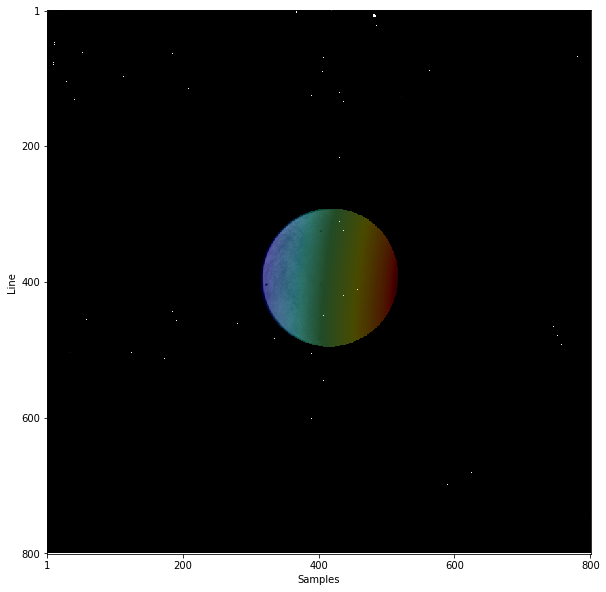

In [1488]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.imshow(img.data, cmap='gray', extent=img.extent, vmin = 0, vmax =1)
ax.imshow(img.inc, cmap='jet', extent=img.extent, alpha=.3)

ax.set_xlabel('Samples')
ax.set_ylabel('Line')
ax.set_xticks(img.sticks)
ax.set_yticks(img.lticks);

In [1489]:
global_cond = (10 < img.inc) & (img.inc <= 80) & (10 < img.emi) & (img.emi <= 80) & \
       (0.1 < img.data) & (img.data <=1)

S = 380
#L = 350

cond_sample = global_cond & (img.s == S) 
#cond_sample = (img.s == S)
#cond_line = global_cond & (img.l == L)

C:\Users\rajanidh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
C:\Users\rajanidh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  


In [1490]:
#L = 312
#i_f = img.data[:, L]
#inc = img.inc[:, L]
#emi = img.emi[:, L]
#mu0 = img.mu0[:, L]
#mu1 = img.mu1[:, L]

# S = 300
# i_f = sub_data[S, :]
# inc = sub_inc[S, :]
# emi = sub_emi[S, :]
# mu0 = img.mu0[S, :]
# mu1 = img.mu1[S, :]

def xy(my_image, b):
    return 1 /(my_image.mu0[b] + my_image.mu1[b]), a.data[b] / my_image.mu0[b]

def xy(img, cond_line):
    return 1 /(img.mu0[cond_line] + img.mu1[cond_line]), img.data[cond_line] / img.mu0[cond_line]

def xy(img, cond_sample):
    return 1 /(img.mu0[cond_sample] + img.mu1[cond_sample]), img.data[cond_sample] / img.mu0[cond_sample]

def xy(img, global_cond):
    return 1 /(img.mu0[global_cond] + img.mu1[global_cond]), img.data[global_cond] / img.mu0[global_cond]

In [1491]:
# xdata = 1 /(mu0 + mu1)
# ydata = i_f / mu0
#cond = ~np.isnan(xdata) & ~np.isnan(ydata)  
# cond = ~np.isnan(xdata) & ~np.isnan(ydata)  
#cond = np.less(img.inc, max_inc = 85, where=img.ground) #& np.less(img.emi, max_emi = 85, where=img.ground) & np.greater(img.data, min_data = 0.1, where=img.ground) & np.less(img.data, max_data = 1, where=img.ground) & img.ground

#xdata, ydata = xy(img, cond_line)
xdata, ydata = xy(img, cond_sample)
#xdata, ydata = xy(img, global_cond)

C, D, r_value, p_value, std_err = linregress(xdata, ydata)

A_ls = 1 - D
f_alpha_ls = C / (1 - D)

f'A: {A_ls:.2e}, f_alpha: {f_alpha_ls:.2e}, r^2: {r_value**2:.2f}'

#print(A)
#print(f_alpha)
#X = np.linspace(x.min(), x.max(), 100)
#Y = A * X + f_alpha



'A: 4.25e-01, f_alpha: 1.86e-01, r^2: 0.10'

In [1492]:
#x = np.linspace(np.nanmin(xdata), np.nanmax(xdata))
#y = C * x + D

#a, b, r_value, p_value, std_err = linregress(xdata, ydata)
#A, f_alpha, r_value, p_value, std_err = linregress(xdata, ydata)

X_1 = np.linspace(x.min(), x.max(), 100)
Y_1 = C * X + D

#print(A)
#print(f_alpha)

#x = np.linspace(np.nanmin(xdata), np.nanmax(xdata))
#y = k * x + lnB0

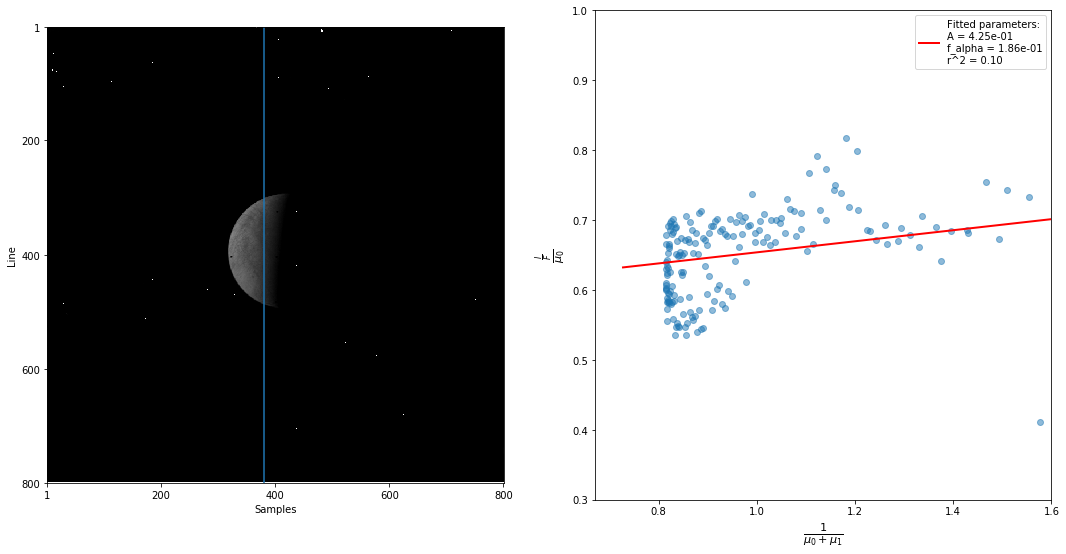

In [1493]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 9))

ax0.imshow(img.data, cmap='gray', extent=img.extent, vmin=0, vmax=1)
#ax0.imshow(img.inc, cmap='jet', extent=img.extent, alpha=.3)
#ax0.axhline(L)
ax0.axvline(S)

ax0.set_xlabel('Samples')
ax0.set_ylabel('Line')
ax0.set_xticks(img.sticks)
ax0.set_yticks(img.lticks)

ax1.scatter(xdata, ydata, alpha=.5)
#ax1.scatter(x, y, alpha=.5)
ax1.plot(X_1, Y_1, 'r-', lw=2, label=f'Fitted parameters:\nA = {A_ls:.2e}\nf_alpha = {f_alpha_ls:.2e}\nr^2 = {r_value**2:.2f}')
ax1.set_xlabel(r'$\frac{1}{\mu_0 + \mu_1}$', fontsize=16)
ax1.set_ylabel(r'$\frac{\frac{I}{F}}{\mu_0}$', fontsize=16)

ax1.set_xlim(0.67,1.6)
ax1.set_ylim(0.3,1.00)
ax1.legend();

In [1508]:
def photo_func_1(img, mask):
    return np.log(img.mu0[mask] * img.mu1[mask]), np.log(img.data[mask] * img.mu1[mask])

def photo_func_2(img, mask):
    return 1 /(img.mu0[mask] + img.mu1[mask]), img.data[mask] / img.mu0[mask]

photo_func = photo_func_2

In [1509]:
def img_mask(img, max_inc=80, max_emi=80, min_data=0.1, max_data=1):
    """Create a geometric and data mask."""
    return (
        np.less(img.inc, max_inc, where=img.ground) &
        np.less(img.emi, max_emi, where=img.ground) & 
        np.greater(img.data, min_data, where=img.ground) & 
        np.less(img.data, max_data, where=img.ground) &
        img.ground
    )

In [1514]:
#img = SSI('C2062522.pho.cub', align=True)
#img = SSI('C2064913.pho.cub', align=True)
img = SSI('C2065016.pho.cub', align=True)
#img = SSI('C2065024.pho.cub', align=True)
#img = SSI('C2065032.pho.cub', align=True)
#img = SSI('C2065044.pho.cub', align=True)
#img = SSI('C2065052.pho.cub', align=True)
#img = SSI('C2065145.pho.cub', offset_s=6, offset_l=14)#align=True)
#img = SSI('C2065149.pho.cub', offset_s=-1, offset_l=20)
#img = SSI('C2065157.pho.cub', offset_s=1, offset_l=12)
#img = SSI('C2065205.pho.cub', offset_s=1, offset_l=12)
#img = SSI('C2065213.pho.cub', offset_s=0, offset_l=10)
#img = SSI('C2065221.pho.cub', offset_s=1, offset_l=20)
#img = SSI('C2065229.pho.cub', offset_s=0, offset_l=10)
#img = SSI('5126r_cal.pho.cub', align= True)
#img = SSI('C0374649026R.pho.cub', align = True)
#img = SSI('C0416073100R_cal.pho.cub', offset_l=8) #high phase 180
#img = SSI('C0552809352R_cal.pho.cub', align = True)


img_geol = EUROPA(img)

IF = img_mask(img, min_data=0.1)
x, y = photo_func(img, IF)


In [1515]:
A_fd = 1 - b
f_alpha_fd = a / (1 - b)

f'A: {A_fd:.2e}, f_alpha: {f_alpha_fd:.2e}, r^2: {r_value**2:.2f}'

'A: 6.02e-01, f_alpha: 3.89e-01, r^2: 0.25'

In [1516]:
a, b, r_value, p_value, std_err = linregress(x, y)

X = np.linspace(x.min(), x.max(), 100)
Y = a * X + b



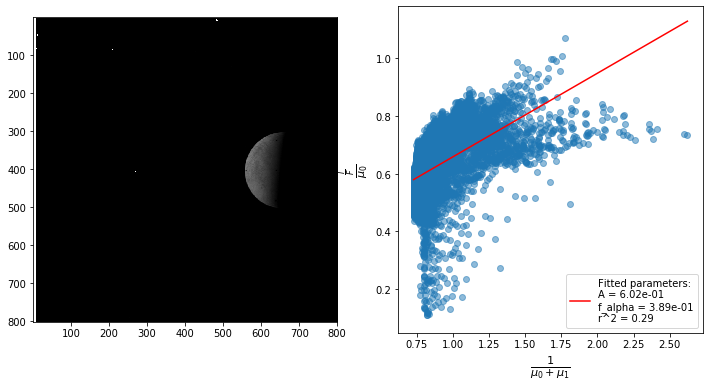

In [1517]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

ax0.imshow(img.data, extent=img.extent, vmin=0, vmax=1, cmap='gray')
ax1.scatter(x, y, alpha = 0.5)#, color = 'blue')#, alpha=.5)
ax1.plot(X, Y, 'r-',label=f'Fitted parameters:\nA = {A_fd:.2e}\nf_alpha = {f_alpha_fd:.2e}\nr^2 = {r_value**2:.2f}')
ax1.set_xlabel(r'$\frac{1}{\mu_0 + \mu_1}$', fontsize=16)
ax1.set_ylabel(r'$\frac{\frac{I}{F}}{\mu_0}$', fontsize=16)
ax1.legend();

In [1467]:
samples = np.arange(225, 245)
A, f_alpha = np.transpose([fit_2_sample(img, int(sample)) for sample in samples])

A, f_alpha

ValueError: Inputs must not be empty.

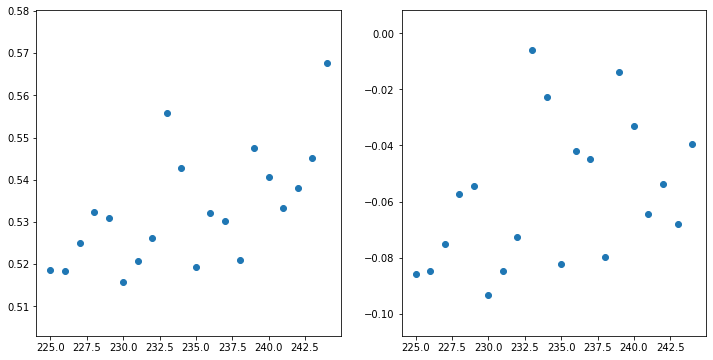

In [27]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

ax0.scatter(samples, A)
ax1.scatter(samples, f_alpha);

In [19]:
np.mean(A), np.std(A), np.mean(f_alpha), np.std(f_alpha)

(0.5330710745353906,
 0.013395446154175204,
 -0.05790271148923839,
 0.025003256940728958)

In [34]:
x = np.linspace(np.nanmin(xdata), np.nanmax(xdata))
y = k * x + lnB0

NameError: name 'k' is not defined

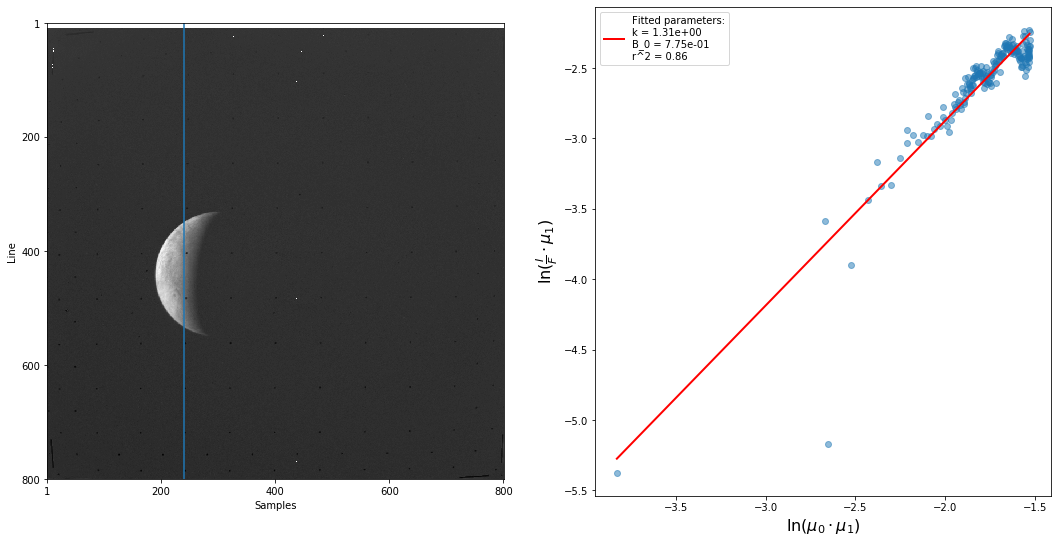

In [1000]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 9))

ax0.imshow(img.data, cmap='gray', extent=img.extent)
#ax0.imshow(img.inc, cmap='jet', extent=img.extent, alpha=.3)
#ax0.axhline(L)
ax0.axvline(S)

ax0.set_xlabel('Samples')
ax0.set_ylabel('Line')
ax0.set_xticks(img.sticks)
ax0.set_yticks(img.lticks)

ax1.scatter(xdata, ydata, alpha=.5)
ax1.plot(x, y, 'r-', lw=2, label=f'Fitted parameters:\nk = {k:.2e}\nB_0 = {np.exp(lnB0):.2e}\nr^2 = {r_value**2:.2f}')#'\n)
ax1.set_xlabel(r'$\ln(\mu_0 \cdot \mu_1)$', fontsize=16)
ax1.set_ylabel(r'$\ln(\frac{I}{F} \cdot \mu_1)$', fontsize=16)
ax1.legend();

In [1001]:
cond = ~np.isnan(img.phase)
np.max(img.phase[cond])

109.1489486694336

In [1002]:
cond = ~np.isnan(img.inc)
np.max(img.inc[cond])

179.85714721679688

In [1003]:
cond = ~np.isnan(img.phase)
np.min(img.phase[cond])

108.29100036621094

In [1004]:
cond = ~np.isnan(img.emi)
np.max(img.emi[cond])

89.80587768554688